In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import skfuzzy as fuzz
from tqdm.notebook import tqdm

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

A = np.asarray( [1.0, 0.8, 0.0, 0.0] )   # small
B = np.asarray( [0.0, 0.5, 1.0, 0.5, 0.0] )    # medium

In [3]:
def implication_zadeh(x,y):   #luk
    return min( 1.0 , 1.0 - x + y )

def implication_correlation_min(x,y):
    return min( x, y )

def implication_correlation_prod(x,y):
    return (x * y)

# Problem 1: If A then B

## compositional rule of inference using lukassiewicz operator

In [4]:
R_luk = np.zeros((len(A),len(B)))
for i in range(len(A)):
    for j in range(len(B)):
        R_luk[i,j] = implication_zadeh(A[i],B[j])

newB = np.zeros(len(B))
for j in range(len(B)):
    for i in range(len(A)):
        temp = min(A[i],R_luk[i,j])
        if(temp > newB[j]):
            newB[j] = temp
print(f"B' = {newB} != {B}")
R_luk

B' = [0.2 0.7 1.  0.7 0.2] != [0.  0.5 1.  0.5 0. ]


array([[0. , 0.5, 1. , 0.5, 0. ],
       [0.2, 0.7, 1. , 0.7, 0.2],
       [1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. ]])

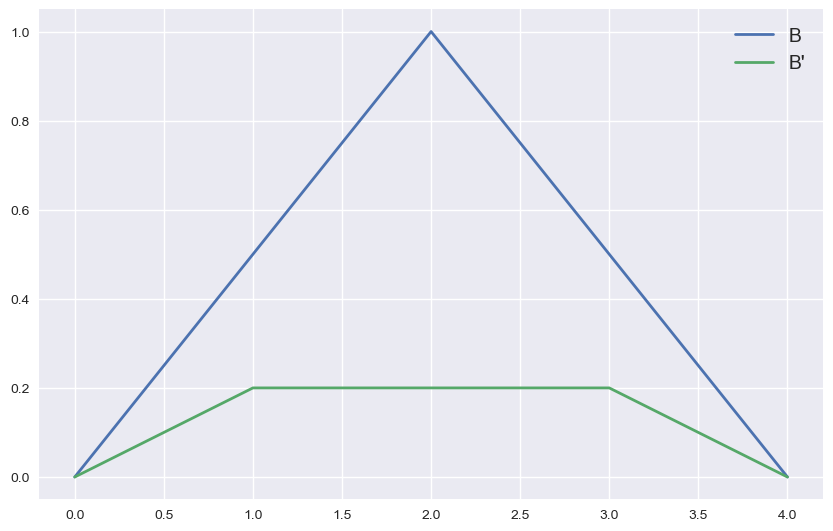

In [29]:
plt.style.use('seaborn')

# plot
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(B, linewidth=2.0,label="B")
ax.plot(newB, linewidth=2.0, label="B'")
ax.legend(fontsize=14)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

## compositional rule of inference using correlation min operator

In [6]:
R_cm = np.zeros((len(A),len(B)))
for i in range(len(A)):
    for j in range(len(B)):
        R_cm[i,j] = implication_correlation_min(A[i],B[j])
        
newB = np.zeros(len(B))
for j in range(len(B)):
    for i in range(len(A)):
        temp = min(A[i],R_cm[i,j])
        if(temp > newB[j]):
            newB[j] = temp
print(f"B' = {newB} == {B}")
R_cm

B' = [0.  0.5 1.  0.5 0. ] == [0.  0.5 1.  0.5 0. ]


array([[0. , 0.5, 1. , 0.5, 0. ],
       [0. , 0.5, 0.8, 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

# Problem 2: If Not A, then B

## using lukasiewicz

In [9]:
A = np.asarray( [1-1.0, 1-0.8, 1-0.0, 1-0.0] )   # not A
print(f"!A = {A}")

newB = np.zeros(len(B))
for j in range(len(B)):
    for i in range(len(A)):
        temp = min(A[i],R_luk[i,j])
        if(temp > newB[j]):
            newB[j] = temp
print(f"B' = {newB}")

!A = [0.  0.2 1.  1. ]
B' = [1. 1. 1. 1. 1.]


## using correlation min

In [11]:
print(f"A comp={A}")
        
newB = np.zeros(len(B))
for j in range(len(B)):
    for i in range(len(A)):
        temp = min(A[i],R_cm[i,j])
        if(temp > newB[j]):
            newB[j] = temp
print(newB)

A comp=[0.  0.2 1.  1. ]
[0.  0.2 0.2 0.2 0. ]


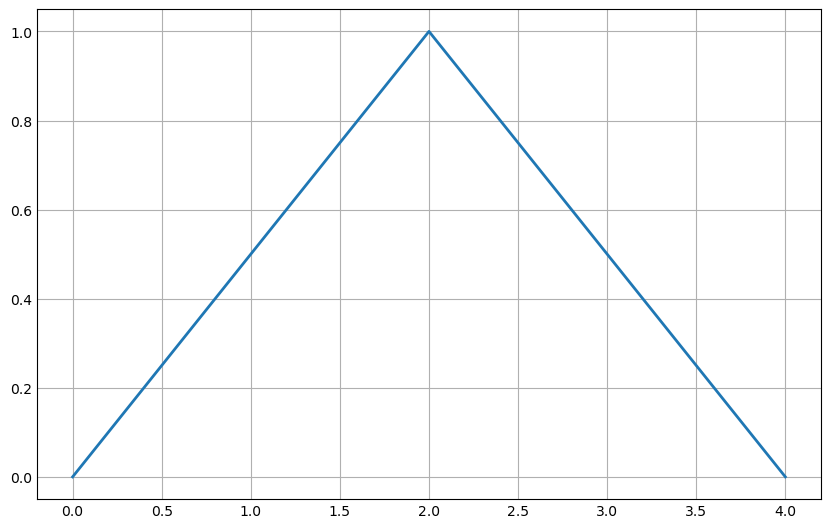